In [11]:
documents = []

file = open('Tratando Arquivos/nytimes.txt', 'r')
for line in file:
    documents.append(line)
file.close()

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 200 # max number of uniq words

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [46]:
from sklearn.decomposition import LatentDirichletAllocation

no_topics = 7
learning_decay = .5
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0,learning_decay = learning_decay).fit(tf)

In [47]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(message)
    print()

In [48]:
no_top_words = 5
display_topics(lda, tf_feature_names, no_top_words)

Topic #0: said sexual assault accused brett
Topic #1: emmys winners emmy list awards
Topic #2: new emmys years live largest
Topic #3: korea north president south people
Topic #4: judge campaign like confirmation brett
Topic #5: year china trump musk war
Topic #6: political ago yes xs look



In [49]:
import pandas as pd
import numpy as np
   
# Create Document - Topic Matrix
lda_output = lda.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(no_topics)]

# index names
docnames = [str(i) for i in range(len(documents))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
   color = 'green' if val > .1 else 'black'
   return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,dominant_topic
0,0.01,0.01,0.01,0.91,0.01,0.01,0.01,3
1,0.93,0.01,0.01,0.01,0.01,0.01,0.01,0
2,0.02,0.02,0.02,0.86,0.02,0.02,0.02,3
3,0.02,0.02,0.02,0.02,0.02,0.88,0.02,5
4,0.88,0.02,0.02,0.02,0.02,0.02,0.02,0
5,0.38,0.01,0.01,0.01,0.58,0.01,0.01,4
6,0.05,0.05,0.05,0.71,0.05,0.05,0.05,3
7,0.02,0.02,0.02,0.02,0.02,0.89,0.02,5
8,0.58,0.02,0.02,0.02,0.02,0.33,0.02,0
9,0.83,0.03,0.03,0.03,0.03,0.03,0.03,0


In [50]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,46
1,3,31
2,5,28
3,1,25
4,2,21
5,4,10
6,6,8


In [51]:
df_topic_distribution = df_document_topic['dominant_topic']
#df_topic_distribution.columns = ['Topic Num', 'Num Documents']
i = 0
for doc in df_topic_distribution:
    if doc == 1:
        print(documents[i])
    i = i + 1


In recent years hundreds rights activists lawyers China imprisoned disappeared Many retreated silence fled overseas But including Xu Zhiyong still speaking 

Evening Briefing Here need know end day 

A complete list winners Emmys 

Evening Briefing Here need know end day 

Photos A faded hotel became last ditch shelter Florence evacuees 

As remnants Hurricane Florence leave Carolinas water levels still unlikely recede fully days 

Hotel employees know cannot rebuild anyone home But give Florence evacuees free night bring fresh set towels make guests comfortable 

The hotel Afghanistan refuses close doors 

Pollen trapped ice Alps reveal collapse agriculture associated plague bad weather led poor harvests fields lay fallow one left work 

Senator Claire McCaskill Missouri playing tough audiences days faces political fight life 

The elephant room Leslie Moonves went unmentioned Emmys 

The deaths Defqon 1 festival Sydney renewed debate drug policy Australia I imagine government would b

In [52]:
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer, mds='tsne')
panel

c:\users\pc-dell\appdata\local\programs\python\python36\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0       -1.229344 -272.876526       1        1  25.050566
3      191.042282  142.980179       2        1  19.591029
5     -133.234207  -85.657127       3        1  19.277687
1       94.904663  -64.947632       4        1  12.853954
2      323.044281  -44.239620       5        1   8.978379
4      -37.097145  122.272003       6        1   8.398196
6      226.908951 -252.166946       7        1   5.850188, topic_info=     Category       Freq        Term      Total  loglift  logprob
term                                                             
36    Default  12.000000       emmys  12.000000  30.0000  30.0000
63    Default   9.000000       korea   9.000000  29.0000  29.0000
82    Default   5.000000         new   5.000000  28.0000  28.0000
196   Default   8.000000        year   8.000000  27.0000  27.0000
120   Default  16.000000        said  16.000000  26.0000  26.0000
187   Default   5.000000     winners   5.000000  25.0000  25.0000
35    Default   5.000000        emmy   5.000000  24.0000  24.0000
197   Default   7.000000       years   7.000000  23.0000  23.0000
19    Default   5.000000      carpet   5.000000  22.0000  22.0000
112   Default   5.000000         red   5.000000  21.0000  21.0000
74    Default   4.000000        look   4.000000  20.0000  20.0000
71    Default   4.000000        list   4.000000  19.0000  19.0000
4     Default   4.000000         ago   4.000000  18.0000  18.0000
8     Default   4.000000      awards   4.000000  17.0000  17.0000
85    Default   8.000000       north   8.000000  16.0000  16.0000
58    Default   4.000000       judge   4.000000  15.0000  15.0000
79    Default   6.000000        musk   6.000000  14.0000  14.0000
22    Default   6.000000       china   6.000000  13.0000  13.0000
100   Default   3.000000   political   3.000000  12.0000  12.0000
10    Default   6.000000        best   6.000000  11.0000  11.0000
72    Default   3.000000        live   3.000000  10.0000  10.0000
84    Default   4.000000       night   4.000000   9.0000   9.0000
198   Default   2.000000         yes   2.000000   8.0000   8.0000
16    Default   3.000000    campaign   3.000000   7.0000   7.0000
195   Default   2.000000          xs   2.000000   6.0000   6.0000
102   Default  10.000000   president  10.000000   5.0000   5.0000
62    Default   6.000000        know   6.000000   4.0000   4.0000
65    Default   3.000000     largest   3.000000   3.0000   3.0000
15    Default   6.000000    briefing   6.000000   2.0000   2.0000
95    Default   6.000000      people   6.000000   1.0000   1.0000
...       ...        ...         ...        ...      ...      ...
168    Topic7   0.419977          tv   2.287953   1.1435  -4.7034
112    Topic7   1.014141         red   5.599997   1.1300  -3.8218
177    Topic7   0.394846        want   2.193372   1.1240  -4.7651
184    Topic7   0.404243        west   2.265532   1.1151  -4.7416
105    Topic7   0.388457     program   2.333422   1.0458  -4.7814
166    Topic7   0.378686     tuesday   2.402186   0.9913  -4.8069
29     Topic7   0.410713     country   2.713485   0.9506  -4.7257
196    Topic7   1.023515        year   8.301712   0.7455  -3.8126
192    Topic7   0.196304       worst   2.152449   0.4440  -5.4640
8      Topic7   0.409788      awards   4.590244   0.4226  -4.7280
94     Topic7   0.219959       peace   2.490863   0.4118  -5.3502
158    Topic7   0.410390        time   4.730586   0.3940  -4.7265
133    Topic7   0.189986       space   2.277818   0.3547  -5.4967
23     Topic7   0.422796     chinese   5.119842   0.3447  -4.6967
138    Topic7   0.186132  statements   2.271133   0.3371  -5.5172
170    Topic7   0.197001      unable   2.443490   0.3207  -5.4604
190    Topic7   0.184444        work   2.288549   0.3204  -5.5263
131    Topic7   0.183945      social   2.367332   0.2838  -5.5290
171    Topic7   0.193740  understand   2.499096   0.2815  -5.4771
157

Text(0.5,1,'Segregation of Topic Clusters')

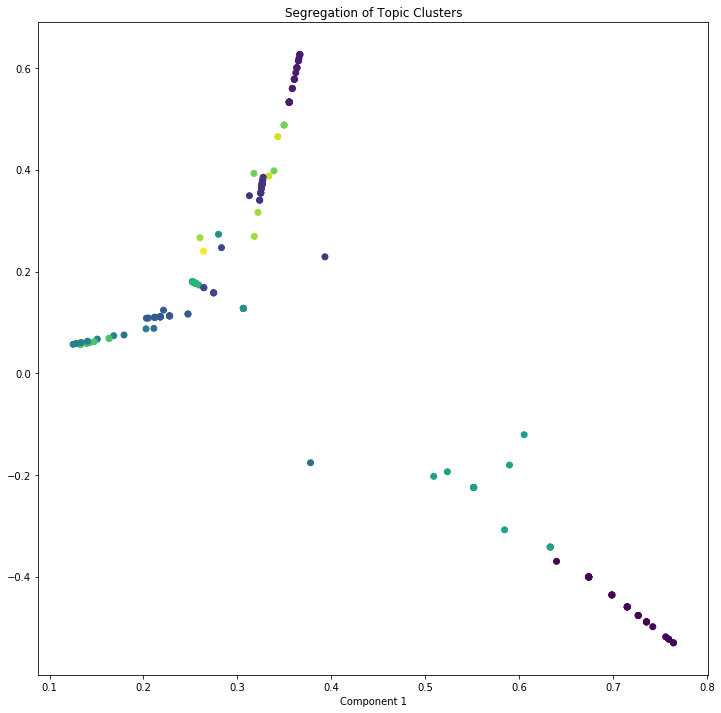

In [53]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(lda_output)

# Build the Singular Value Decomposition(SVD) model
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)

# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )